<h2>Nama Anggota Kelompok 1: </h2>
<li>Afif Qomarul Ghulam / 2041720176</li>
<li>Iqshan Bagus Prasetyo / 2041720096</li>
<li>Muhammad Al Kausar Ramadhan / 2041720193</li>
<li>Muhamad Alif Rizki / 2041720196</li>
<li>R. Muhammad Azmi Herdi / 2041720079</li>

In [169]:
# Install Package
# %pip install twint
# %pip install nest_asyncio

# # Fix Issue with twint 20.1.20 from pip --> upgrade to 20.1.21 directly from git
# %pip install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

<b>NOMOR 1</b>. Lakukan scrapping data twitter pada akun College Menfest (@collegemenfess) sejumlah 5000
twit. Anda dapat menggunakan library Twint atau API resmi dari twitter.

In [170]:
# Memanggil Libary Twint dan Nest Asychio, lalu melakukan instanisiasi nest asyncio

# import twint
# import nest_asyncio
# nest_asyncio.apply()

# # inisiasi obyek

# c = twint.Config()

# # config scrap dengan memasukan username twitter lalu tanggal yang akan diambil dan batas tweet
# c.Username = "collegemenfess"
# c.Since = "2022-12-04"
# c.Until = "2022-12-11"
# c.Limit = 5000
# c.Store_csv = True
# c.Output = "colle_scrap.csv"

# # run scrap
# twint.run.Search(c)

In [171]:
# Memanggil Libary Pandas
import pandas as pd

# Menggunakan Pandas Untuk Membaca File Twitter Yang Sudah Di Scrapping
df = pd.read_csv('colle_scrap.csv')

# Menampilkan Column Tweet
df['tweet'].head()

0         [cm] bisa ga sih skripsi tuh diilangin aja 🥲
1    [cm] tolong infonya ya makasih guys  https://t...
2    [cm] gaiss ada yg tau cara nyari jumlah atau d...
3    Besok aku praktik pertama kalinya di rumah sak...
4    ayooo bantu sender nyetok bahan2!! tia [cm]  h...
Name: tweet, dtype: object

In [172]:
# Melihat Informasi Data Yang Tidak Null Dari File Colle Scrap
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5000 non-null   int64  
 1   conversation_id  5000 non-null   int64  
 2   created_at       5000 non-null   object 
 3   date             5000 non-null   object 
 4   time             5000 non-null   object 
 5   timezone         5000 non-null   int64  
 6   user_id          5000 non-null   int64  
 7   username         5000 non-null   object 
 8   name             5000 non-null   object 
 9   place            0 non-null      float64
 10  tweet            5000 non-null   object 
 11  language         5000 non-null   object 
 12  mentions         5000 non-null   object 
 13  urls             5000 non-null   object 
 14  photos           5000 non-null   object 
 15  replies_count    5000 non-null   int64  
 16  retweets_count   5000 non-null   int64  
 17  likes_count   

In [173]:
# Memanggil Column Tweet Dan Menampilkan Sebanyak 5 Row 
df['tweet'].head()

0         [cm] bisa ga sih skripsi tuh diilangin aja 🥲
1    [cm] tolong infonya ya makasih guys  https://t...
2    [cm] gaiss ada yg tau cara nyari jumlah atau d...
3    Besok aku praktik pertama kalinya di rumah sak...
4    ayooo bantu sender nyetok bahan2!! tia [cm]  h...
Name: tweet, dtype: object

<h3>Import Libary Yang Akan DIbutuhkan</h3>

In [174]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("indonesian"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [175]:
# Function Untuk Menghapus @
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [176]:
# Membuat Sebuah Column Baru Bernama Tidy Tweets Isinya Merupakan Column Tweet Yang Sudah Dibersihkan Patternya Dengan Function Remove Pattern
df['tidy_tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*: | *RT*")
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys https://t...
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm] h...
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Kalimat Http / Https Didalam Tweet </h3>

In [177]:
# Membuat Sebuah Variable Baru
cleaned_tweets = []

# Melakukan Perulangan Untuk Menghapus Kalimat Http Lalu Memasukanya Kedalam Variable Cleaned_Tweets
for index, row in df.iterrows():
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

# Membuat Kolum Baru Dan Mengisikan Datanya Dengan Variable Cleaned_Tweets
df['tidy_tweets'] = cleaned_tweets
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Data Yang Ada Di Column Tidy Tweet Jika Terdapat Kalimat Kosong</h3>

In [178]:

df = df[df['tidy_tweets']!='']
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Tweet Yang Duplikat</h3>

In [179]:

df.drop_duplicates(subset=['tidy_tweets'], keep=False)
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Memperbaiki Posisi Index</h3>

In [180]:

df = df.reset_index(drop=True)
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Huruf Special Seperti (#!?)</h3>

In [181]:
# df['absolute_tidy_tweets'] = df['tidy_tweets'].str.replace("[cm]", "")
df['absolute_tidy_tweets'] = df['tidy_tweets'].str.replace(r'[^a-zA-Z#]+', ' ', regex=True)
# df['absolute_tidy_tweets'] = df['absolute_tidy_tweets'].str.replace(r'[^a-zA-Z#]+', ' ', regex=True)

In [182]:
df[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm bisa ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys,cm tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss ada yg tau cara nyari jumlah atau da...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm],ayooo bantu sender nyetok bahan tia cm
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini buat anak arsi cukup gak TIA
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm kira sopan gak ya ngechat dosbing hari ini...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga...",Siapa yang pernah di posisi ini ada solusi gak...
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm ada mahasiswa magister akuntansi ekonomi g...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal di Indo...


<h3>Menghapus Stop Word Menggunakan Stop Word Indonesia</h3>

In [183]:
# Inisiasi Stopword
stopwords_set = set(stopwords)
# Variable Baru 
cleaned_tweets = []

# Perulangan Untuk Menghapus Kalimat Kata Kerja Menggunakan Stopword dalam bahasa indonesia, 
# lalu kalimat tersebut disimpan dalam variable Cleaned_Tweets
for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

# Membuat Kolum Baru, lalu mengisikan datanya dengan varible cleaned_tweets 
df['absolute_tidy_tweets'] = cleaned_tweets
df[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys,cm tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm],ayooo bantu sender nyetok bahan tia cm
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...


<h3>Proses Tokenize Pada Kolum Absolute Tidy Tweers</h3>

In [184]:
tokenized_tweet = df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0          [cm, ga, sih, skripsi, tuh, diilangin, aja]
1             [cm, tolong, infonya, ya, makasih, guys]
2    [cm, gaiss, yg, tau, nyari, daftar, perusahaan...
3    [Besok, praktik, kalinya, rumah, sakit, Jantun...
4       [ayooo, bantu, sender, nyetok, bahan, tia, cm]
Name: absolute_tidy_tweets, dtype: object

<h3>Proses Mengubah Kalimat Menjadi Lemma</h3>

In [185]:
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0          [cm, ga, sih, skripsi, tuh, diilangin, aja]
1              [cm, tolong, infonya, ya, makasih, guy]
2    [cm, gaiss, yg, tau, nyari, daftar, perusahaan...
3    [Besok, praktik, kalinya, rumah, sakit, Jantun...
4       [ayooo, bantu, sender, nyetok, bahan, tia, cm]
Name: absolute_tidy_tweets, dtype: object

<h3>Menggabungkan Token Menjadi Sentence</h3>

In [186]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

df['absolute_tidy_tweets'] = tokenized_tweet
df[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys,cm tolong infonya ya makasih guy
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm],ayooo bantu sender nyetok bahan tia cm
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...


<b>Nomor 2</b>. Buatlah model clustering berdasarkan data tersebut. Jumlah cluster adalah 3 yang mewakili 3
sentimen, yaitu, positif, netral, dan negatif. Evaluasi model yang Anda buat.

<h3>Proses Clustering Menggunakan SentimentIntensityAnalyzer</h3>

In [187]:
# Pada proses clustering penentuan sentiment akan ditentukan dari kata, 
# dalam contoh jika ada kata yang merujuk dengan kebahagian maka statusya 
# akan dimasukan sebagai postive, dan sebaliknya

# Sumber Refrensi : https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

# Memanggil Libary SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instanisasi SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

# Membuat Variable Baru Yang Digunakan Menampung Score Dari Semua Data Dari Kolum absolute_tidy_tweets
list1 = []
for i in df['absolute_tidy_tweets']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [188]:
# Membuat Kolum Baru, Lalu Mengisinya Dengan Score
df['sentiment'] = pd.Series(list1)

# Function Sentiment_Category Digunakan Untuk Menetukan Score Dari Sentiment
# Terdapat percabangan untuk menentukan category dari sentiment tersebut
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [189]:
df[['tweet', 'absolute_tidy_tweets','sentiment', 'sentiment_category']].head(10)

,tweet,absolute_tidy_tweets,sentiment,sentiment_category
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja,0.0000,neutral
1,[cm] tolong infonya ya makasih guys https://t...,cm tolong infonya ya makasih guy,0.0000,neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...,0.6166,positive
3,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...,0.0000,neutral
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan tia cm,0.5106,positive
5,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA,0.6166,positive
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...,0.0000,neutral
7,"Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm,0.0000,neutral
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...,0.0000,neutral
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...,0.0000,neutral


<h3>Class PhraseExtractHelper Digunakan Untuk Proses Pre-processing</h3>

In [190]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        # """Proses menemukan np didalam node"""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        # """Membuat Kalimat Capital Menjadi Lower, Kemudian dilakukan proses lemme"""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        # """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

In [191]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [192]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['[cm] sih skripsi tuh diilangin aja'],
 ['[cm] tolong infonya makasih guy'],
 ['[cm] gaiss tau nyari daftar perusahaan manufaktur sub sektor industri bei brp gasi',
  'gimana neliti datanya',
  '2018-2021 . ti'],
 ['besok praktik kalinya rumah sakit jantung',
  'karuan gini',
  'gelisah',
  'takut ngadepin situasi diharapkam 😭😭 ['],
 ['ayooo bantu sender nyetok bahan2 tia [cm]'],
 ['[cm] spek laptop gini anak arsi gak'],
 ['[cm] kira2 sopan gak', 'konsultasi skripsi besok'],
 ['posisi', 'solusi gak', '[cm]'],
 ['[cm] mahasiswa magister akuntansi', 'gaaa', 'nya linear'],
 ['[cm] gais kampus pendidikan',
  'terkenal indonesia',
  ' upi , un',
  'dll',
  'negeri  ya?']]

<h3>Proses TextBlob</h3>

In [193]:
# Proses textblob digunakan untuk menghapus kalimat - kalimat yang tidak sesuai, 
# kalimat tersebut tidak boleh ada di key_phrases
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['bisa ga sih skripsi tuh diilangin aja \U0001f972'],
 ['tolong infonya ya makasih guys'],
 ['gaiss ada yg tau cara nyari jumlah atau daftar perusahaan manufaktur sub sektor industri misalnya yg ada di bei jumlahnya brp gasi',
  'gimana ya caranya soalnya aku neliti datanya dr'],
 ['besok aku praktik pertama kalinya di rumah sakit jantung degdegan ga karuan gini',
  'takut ngadepin situasi yg tidak diharapkam 😭😭😭'],
 ['ayooo bantu sender nyetok bahan2'],
 ['spek laptop gini buat anak arsi cukup gak'],
 ['kira2 sopan gak ya ngechat',
  'hari ini',
  'aku mau konsultasi skripsi buat besok'],
 ['siapa yang pernah di posisi ini', 'ada solusi gak ya kira²'],
 ['cm',
  'ada mahasiswa magister akuntansi/ekonomi gaaa',
  'yg s1 nya ga linear'],
 ['gais kampus pendidikan yg terkenal di indonesia kan ada upi',
  'kalau di luar negeri apa ya']]

In [194]:
df['key_phrases'] = textblob_key_phrases
df[['tweet', 'absolute_tidy_tweets', 'sentiment', 'sentiment_category', 'key_phrases']].head(10)

,tweet,absolute_tidy_tweets,sentiment,sentiment_category,key_phrases
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja,0.0000,neutral,[bisa ga sih skripsi tuh diilangin aja 🥲]
1,[cm] tolong infonya ya makasih guys https://t...,cm tolong infonya ya makasih guy,0.0000,neutral,[tolong infonya ya makasih guys]
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...,0.6166,positive,[gaiss ada yg tau cara nyari jumlah atau dafta...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...,0.0000,neutral,[besok aku praktik pertama kalinya di rumah sa...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan tia cm,0.5106,positive,[ayooo bantu sender nyetok bahan2]
5,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA,0.6166,positive,[spek laptop gini buat anak arsi cukup gak]
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...,0.0000,neutral,"[kira2 sopan gak ya ngechat, hari ini, aku mau..."
7,"Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm,0.0000,neutral,"[siapa yang pernah di posisi ini, ada solusi g..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...,0.0000,neutral,"[cm, ada mahasiswa magister akuntansi/ekonomi ..."
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...,0.0000,neutral,[gais kampus pendidikan yg terkenal di indones...


In [195]:
tweets_df2 = df[df['key_phrases'].str.len()>0]

<h3>Proses Ekstrasi Menggunakan CountVectorizer Dan  TF IDF</h3>

In [196]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words=stopwords)
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=stopwords)
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

c:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [197]:
phrase_sents = tweets_df2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

<b>Nomor 3</b> Setelah cluster didapatkan, lakukan proses labeling terhadap cluster yang dihasilkan sesuai dengan
sentiment yang ditentukan. Pada proses ini Anda dapat melakukannya dengan metode expert
judgement atau asumsi kelompok.

Map target variables

In [198]:
target_variable = tweets_df2['sentiment_category'].apply(lambda x: 0 if x=='negative' else 1)

In [199]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

<b>Nomor 4</b> Setelah proses labeling dilakukan, buatlah model klasifikasi dengan menggunakan data yang
sudah Anda beri label. Evaluasi model yang Anda buat (akurasi dan presisi).

In [200]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### Predictions on 'key words' based features

BOW word features

Accuracy Score - 0.8613529805760214


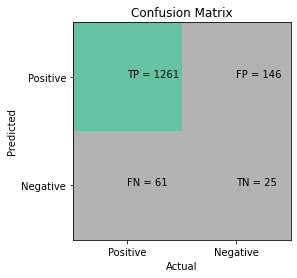

In [201]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

TF-IDF word features

Accuracy Score - 0.8586738111185532


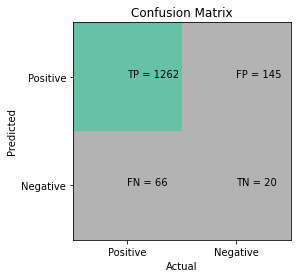

In [202]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

<b>Nomor 5</b> Lakukan prediksi sentimen data twitter yang baru (500 twit). Evaluasi akurasi dari model
berdasarkan data baru

In [203]:
# # Memanggil Libary Twint dan Nest Asychio, lalu melakukan instanisiasi nest asyncio

# import twint
# import nest_asyncio
# nest_asyncio.apply()

# # inisiasi obyek

# c = twint.Config()

# # config scrap dengan memasukan username twitter lalu tanggal yang akan diambil dan batas tweet
# c.Username = "collegemenfess"
# c.Limit = 500
# c.Store_csv = True
# c.Output = "colle_scrap_nomor_05.csv"


# # run scrap
# twint.run.Search(c)

In [234]:
tugas = pd.read_csv('colle_scrap_nomor_05.csv')
tugas['tweet'].head()

0    [cm] guys mau nanya, kalo pengutipan kayak "me...
1    [cm] deket2 tahun baru dosen mulai cuti dari t...
2    Mau minta pendapatnya dong [cm]  lagi bimbang ...
3    Mau tanya dong, menurut kalian standar ip k  b...
4    [Cm] besok mau sidang akhir deg degan banget g...
Name: tweet, dtype: object

In [235]:
tugas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               500 non-null    int64  
 1   conversation_id  500 non-null    int64  
 2   created_at       500 non-null    object 
 3   date             500 non-null    object 
 4   time             500 non-null    object 
 5   timezone         500 non-null    int64  
 6   user_id          500 non-null    int64  
 7   username         500 non-null    object 
 8   name             500 non-null    object 
 9   place            0 non-null      float64
 10  tweet            500 non-null    object 
 11  language         500 non-null    object 
 12  mentions         500 non-null    object 
 13  urls             500 non-null    object 
 14  photos           500 non-null    object 
 15  replies_count    500 non-null    int64  
 16  retweets_count   500 non-null    int64  
 17  likes_count     

In [236]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tugas['tidy_tweets'] = np.vectorize(remove_pattern)(tugas['tweet'], "@[\w]*: | *RT*")
tugas[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me..."
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang ...
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k b..."
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru..."
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n..."
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it..."


In [237]:
cleaned_tweets_tugas = []

for index, row in tugas.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets_tugas.append(' '.join(words_without_links))

tugas['tidy_tweets'] = cleaned_tweets_tugas
tugas[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me..."
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang b...
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k ba..."
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru..."
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n..."
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it..."


In [238]:
tugas = tugas[tugas['tidy_tweets']!='']
tugas[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me..."
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang b...
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k ba..."
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru..."
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n..."
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it..."


In [239]:
tugas.drop_duplicates(subset=['tidy_tweets'], keep=False)
tugas[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me..."
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang b...
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k ba..."
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru..."
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n..."
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it..."


In [241]:
tugas['absolute_tidy_tweets'] = tugas['tidy_tweets'].str.replace(r'[^a-zA-Z#]+', ' ', regex=True)
tugas['absolute_tidy_tweets'] = tugas['absolute_tidy_tweets'].str.lower()

In [242]:
tugas[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me...",cm guys mau nanya kalo pengutipan kayak menur...
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...,cm deket tahun baru dosen mulai cuti dari tgl...
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang b...,mau minta pendapatnya dong cm lagi bimbang ban...
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k ba...",mau tanya dong menurut kalian standar ip k bag...
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...,cm besok mau sidang akhir deg degan banget gu...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru...",tadi aku stalk search bar tentang sem pls trus...
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n...",cm kalian kalo liburan tetep bayaar kosan nggaa
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...,cm kalian yg skripsian dapet dospem yg killer...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester terima kasih s...
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it...",cm halo mau nanya minimal mengikuti msib itu ...


In [243]:
stopwords_set = set(stopwords)
cleaned_tweets_tugas = []

for index, row in tugas.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets_tugas.append(' '.join(words_without_stopwords))
    
tugas['absolute_tidy_tweets'] = cleaned_tweets_tugas
tugas[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me...",cm guys nanya kalo pengutipan kayak xy abc bur...
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...,cm deket dosen cuti tgl brp ya
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang b...,pendapatnya cm bimbang banget
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k ba...",standar ip k bagus cm
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...,cm besok sidang deg degan banget guysssss tips...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru...",stalk search bar sem pls trus tweet lihat vari...
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n...",cm kalo liburan tetep bayaar kosan nggaa
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...,cm yg skripsian dapet dospem yg killer gimana ...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...,pakai ipk semester terima kasih
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it...",cm halo nanya minimal mengikuti msib semester ...


In [244]:
tokenized_tweet_tugas = tugas['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet_tugas.head()

0    [cm, guys, nanya, kalo, pengutipan, kayak, xy,...
1               [cm, deket, dosen, cuti, tgl, brp, ya]
2                   [pendapatnya, cm, bimbang, banget]
3                          [standar, ip, k, bagus, cm]
4    [cm, besok, sidang, deg, degan, banget, guysss...
Name: absolute_tidy_tweets, dtype: object

In [245]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet_tugas = tokenized_tweet_tugas.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet_tugas.head()

0    [cm, guy, nanya, kalo, pengutipan, kayak, xy, ...
1               [cm, deket, dosen, cuti, tgl, brp, ya]
2                   [pendapatnya, cm, bimbang, banget]
3                          [standar, ip, k, bagus, cm]
4    [cm, besok, sidang, deg, degan, banget, guy, t...
Name: absolute_tidy_tweets, dtype: object

In [246]:
for i, tokens in enumerate(tokenized_tweet_tugas):
    tokenized_tweet_tugas[i] = ' '.join(tokens)

tugas['absolute_tidy_tweets'] = tokenized_tweet_tugas
tugas[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...","[cm] guys mau nanya, kalo pengutipan kayak ""me...",cm guy nanya kalo pengutipan kayak xy abc burj...
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,[cm] deket2 tahun baru dosen mulai cuti dari t...,cm deket dosen cuti tgl brp ya
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,Mau minta pendapatnya dong [cm] lagi bimbang b...,pendapatnya cm bimbang banget
3,"Mau tanya dong, menurut kalian standar ip k b...","Mau tanya dong, menurut kalian standar ip k ba...",standar ip k bagus cm
4,[Cm] besok mau sidang akhir deg degan banget g...,[Cm] besok mau sidang akhir deg degan banget g...,cm besok sidang deg degan banget guy tip n tri...
5,"tadi aku stalk search bar tentang sem-pls, tru...","tadi aku stalk search bar tentang sem-pls, tru...",stalk search bar sem pls trus tweet lihat vari...
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...","[cm] kalian kalo liburan, tetep bayaar kosan n...",cm kalo liburan tetep bayaar kosan nggaa
7,[cm] kalian yg skripsian dapet dospem yg kille...,[cm] kalian yg skripsian dapet dospem yg kille...,cm yg skripsian dapet dospem yg killer gimana ...
8,apakah boleh pakai ipk semester 4? Terima kasi...,apakah boleh pakai ipk semester 4? Terima kasi...,pakai ipk semester terima kasih
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...","[cm] Halo mau nanya, minimal mengikuti MSIB it...",cm halo nanya minimal mengikuti msib semester ...


In [247]:
listtugas = []
for i in tugas['absolute_tidy_tweets']:
    listtugas.append((sid.polarity_scores(str(i)))['compound'])

In [248]:
tugas['sentiment'] = pd.Series(listtugas)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

tugas['sentiment_category'] = tugas['sentiment'].apply(sentiment_category)

In [249]:
tugas[['tweet', 'absolute_tidy_tweets','sentiment', 'sentiment_category']].head(10)

,tweet,absolute_tidy_tweets,sentiment,sentiment_category
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...",cm guy nanya kalo pengutipan kayak xy abc burj...,0.5106,positive
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,cm deket dosen cuti tgl brp ya,0.0000,neutral
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,pendapatnya cm bimbang banget,0.0000,neutral
3,"Mau tanya dong, menurut kalian standar ip k b...",standar ip k bagus cm,0.0000,neutral
4,[Cm] besok mau sidang akhir deg degan banget g...,cm besok sidang deg degan banget guy tip n tri...,-0.6486,negative
5,"tadi aku stalk search bar tentang sem-pls, tru...",stalk search bar sem pls trus tweet lihat vari...,0.0772,positive
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...",cm kalo liburan tetep bayaar kosan nggaa,0.0000,neutral
7,[cm] kalian yg skripsian dapet dospem yg kille...,cm yg skripsian dapet dospem yg killer gimana ...,-0.6486,negative
8,apakah boleh pakai ipk semester 4? Terima kasi...,pakai ipk semester terima kasih,0.0000,neutral
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...",cm halo nanya minimal mengikuti msib semester ...,0.0000,neutral


In [252]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in tugas.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['[cm] guy',
  'pengutipan kayak  abc',
  'burjek ..."',
  'dafpusnya nyantumin sumber  ga?  abc aja',
  'trs kalo sumber udh',
  'tetep dicantumin kah'],
 ['[cm] deket2 dosen cuti tgl brp  ya?'],
 ['pendapatnya [cm] bimbang banget'],
 ['standar bagus ? [c'],
 ['[cm] besok sidang deg degan banget guy tip',
  'trik slay dosen penguji killer'],
 ['stalk search bar sem-pls',
  'trus tweet',
  'variabelnya',
  'bersifat variabel laten',
  'sem',
  'carap tau variabel bersifat laten gimana  ya? makasii [cm]'],
 ['[cm] kalo liburan', 'tetep bayaar', 'nggaa'],
 ['[cm] skripsian dapet dospem killer gimana ngatasinnya',
  'stiap bimbingan',
  'takut sndiri deg',
  'parah'],
 ['pakai ipk semester', 'terima'],
 ['[cm] halo nanya',
  'minimal mengikuti  msi semester',
  'semester',
  ' msi masuk semester',
  'msib memasukkan kartu hasil studi semester',
  'kartu hasil studi',
  'lengkap',
  'cont']]

In [253]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in tugas.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['guys mau nanya',
  'kalo pengutipan kayak',
  'menurut xy dalam abc',
  'burjek adalah',
  'di dafpusnya harus nyantumin sumber dari xy juga ga',
  'atau cukup abc aja',
  'trs kalo sumber xy itu udh lebih dari 5 tahun tetep dicantumin kah'],
 ['deket2 tahun baru dosen mulai cuti dari tgl brp ya'],
 ['mau minta pendapatnya dong', 'lagi bimbang banget 😭'],
 ['mau tanya dong', 'menurut kalian standar ip k bagus itu berapa', 'cm'],
 ['cm',
  'besok mau sidang akhir deg degan banget guysssss 😭😭😭 tips n trik agar tetap slay meski dosen penguji killer dong 😭'],
 ['search bar tentang sem-pls',
  'trus ada tweet',
  'lihat variabelnya',
  'jika bersifat variabel laten',
  'maka bisa menggunakan sem',
  'carap tau variabel itu bersifat laten gimana ya?🥺 makasii'],
 ['kalian kalo liburan', 'tetep bayaar kosan nggaa'],
 ['kalian yg skripsian dapet dospem yg killer gimana ngatasinnya',
  '😭 aku stiap mau bimbingan suka takut sndiri deg'],
 ['apakah boleh pakai ipk semester', 'terima kasih sebel

In [254]:
tugas['key_phrases'] = textblob_key_phrases
tugas[['tweet', 'absolute_tidy_tweets', 'sentiment', 'sentiment_category', 'key_phrases']].head(10)

,tweet,absolute_tidy_tweets,sentiment,sentiment_category,key_phrases
0,"[cm] guys mau nanya, kalo pengutipan kayak ""me...",cm guy nanya kalo pengutipan kayak xy abc burj...,0.5106,positive,"[guys mau nanya, kalo pengutipan kayak, menuru..."
1,[cm] deket2 tahun baru dosen mulai cuti dari t...,cm deket dosen cuti tgl brp ya,0.0000,neutral,[deket2 tahun baru dosen mulai cuti dari tgl b...
2,Mau minta pendapatnya dong [cm] lagi bimbang ...,pendapatnya cm bimbang banget,0.0000,neutral,"[mau minta pendapatnya dong, lagi bimbang bang..."
3,"Mau tanya dong, menurut kalian standar ip k b...",standar ip k bagus cm,0.0000,neutral,"[mau tanya dong, menurut kalian standar ip k b..."
4,[Cm] besok mau sidang akhir deg degan banget g...,cm besok sidang deg degan banget guy tip n tri...,-0.6486,negative,"[cm, besok mau sidang akhir deg degan banget g..."
5,"tadi aku stalk search bar tentang sem-pls, tru...",stalk search bar sem pls trus tweet lihat vari...,0.0772,positive,"[search bar tentang sem-pls, trus ada tweet, l..."
6,"[cm] kalian kalo liburan, tetep bayaar kosan n...",cm kalo liburan tetep bayaar kosan nggaa,0.0000,neutral,"[kalian kalo liburan, tetep bayaar kosan nggaa]"
7,[cm] kalian yg skripsian dapet dospem yg kille...,cm yg skripsian dapet dospem yg killer gimana ...,-0.6486,negative,[kalian yg skripsian dapet dospem yg killer gi...
8,apakah boleh pakai ipk semester 4? Terima kasi...,pakai ipk semester terima kasih,0.0000,neutral,"[apakah boleh pakai ipk semester, terima kasih..."
9,"[cm] Halo mau nanya, minimal mengikuti MSIB it...",cm halo nanya minimal mengikuti msib semester ...,0.0000,neutral,"[halo mau nanya, minimal mengikuti msib itu se..."


In [255]:
tweets_tugas2 = tugas[tugas['key_phrases'].str.len()>0]

In [256]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words=stopwords)
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_tugas2['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=stopwords)
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_tugas2['absolute_tidy_tweets'])

c:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [257]:
phrase_sents = tweets_tugas2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

In [258]:
target_variable = tweets_tugas2['sentiment_category'].apply(lambda x: 0 if x=='negative' else 1)

Accuracy Score - 0.9328859060402684


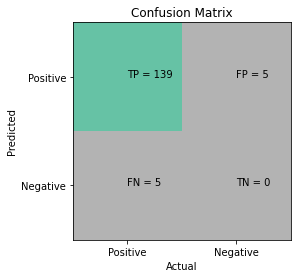

In [259]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

Accuracy Score - 0.9328859060402684


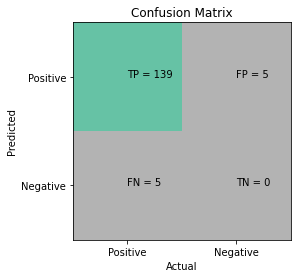

In [260]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)